In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# GPU check
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
# Загрузка датасета
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Нормализация данных
x_train = x_train / 255.0
x_test = x_test / 255.0

# Проверим размерности данных
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [13]:
# Построение модели
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Преобразование входных данных в одномерный массив
    keras.layers.Dense(526, activation='relu'),  # Полносвязный слой с 128 нейронами и функцией активации ReLU
    keras.layers.Dense(20, activation='softmax')  # Выходной слой с 10 нейронами и функцией активации Softmax
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 526)               412910    
                                                                 
 dense_11 (Dense)            (None, 20)                10540     
                                                                 
Total params: 423450 (1.62 MB)
Trainable params: 423450 (1.62 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Обучение модели
history = model.fit(x_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5008 - accuracy: 0.8212 - val_loss: 0.4403 - val_accuracy: 0.8424
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3717 - accuracy: 0.8635 - val_loss: 0.3577 - val_accuracy: 0.8707
Epoch 3/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3328 - accuracy: 0.8774 - val_loss: 0.3482 - val_accuracy: 0.8784
Epoch 4/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3074 - accuracy: 0.8859 - val_loss: 0.3663 - val_accuracy: 0.8681
Epoch 5/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2880 - accuracy: 0.8926 - val_loss: 0.3430 - val_accuracy: 0.8783
Epoch 6/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2708 - accuracy: 0.8991 - val_loss: 0.3314 - val_accuracy: 0.8797
Epoch 7/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2598 - accuracy: 0.9018 - val_loss: 0.3353 - val_accuracy:

313/313 - 1s - loss: 0.3648 - accuracy: 0.8869 - 616ms/epoch - 2ms/step

Test accuracy: 0.886900007724762


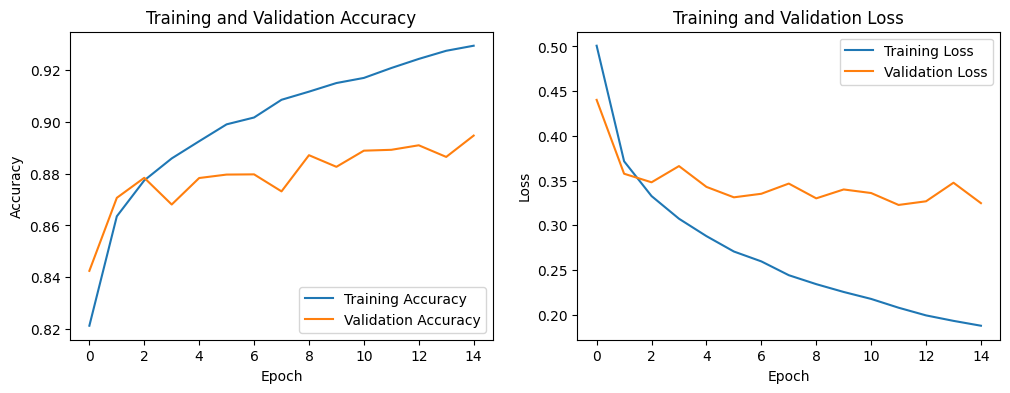

In [15]:
# Оценка модели на тестовых данных
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Построение графиков точности и потерь
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()